In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/VI semester/ML/datasets/Data_Cortex_Nuclear.xls - Hoja1.csv')

#Exploring the dataset
First and last 4 columns need to be removed

In [ ]:
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [ ]:
print('number of columns: ', len(data.columns))

number of columns:  82


In [ ]:
drop_columns_names = [data.columns[0], data.columns[-1], data.columns[-2], data.columns[-3], data.columns[-4]]
data.drop(drop_columns_names,axis=1, inplace=True)

In [ ]:
print('number of columns: ', len(data.columns))

number of columns:  77


Solving null values

In [ ]:
data.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [ ]:
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(data)
pd.DataFrame(imputed_data).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
72    0
73    0
74    0
75    0
76    0
Length: 77, dtype: int64

In [ ]:
data = imputed_data

Implementing PCA <br>
(Why do we use PCA before clustering?
By doing PCA you are retaining all the important information. If your data exhibits clustering, this will be generally revealed after your PCA analysis: by retaining only the components with the highest variance, the clusters will be likely more visibile (as they are most spread out))

In [ ]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data)
data_pca

array([[ 1.33783565,  2.74036117],
       [ 0.92347474,  2.50339481],
       [ 0.894646  ,  2.51039517],
       ...,
       [-2.80183078, -0.74375694],
       [-2.51784238, -0.66635383],
       [-1.97329921, -0.5398095 ]])

No handles with labels found to put in legend.


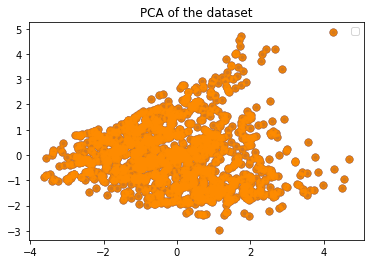

In [ ]:
colors = [ 'navy', 'darkorange']
plt.figure() #Since we only have 2 dimensions we can now draw the data to a 2D space using the same method from above (scatter)
for color, i in zip(colors, [0, 1]):
    plt.scatter(data_pca[:, 0], data_pca[:, 1], color=color, alpha=.8, lw=2,)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of the dataset')
plt.show()

#Clustering


1. DBSCAN

In [ ]:
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

Estimated no. of clusters: 1
Estimated no. of noise points: 13


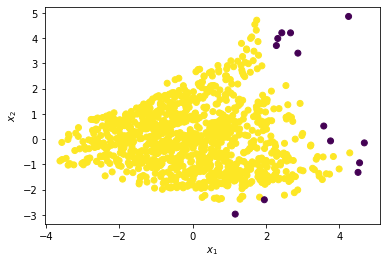

In [ ]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(data_pca)

# Visualizing DBSCAN
plt.scatter(data_pca[:, 0], 
            data_pca[:, 1], 
            c=dbscan_cluster1.labels_)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)


2. K++

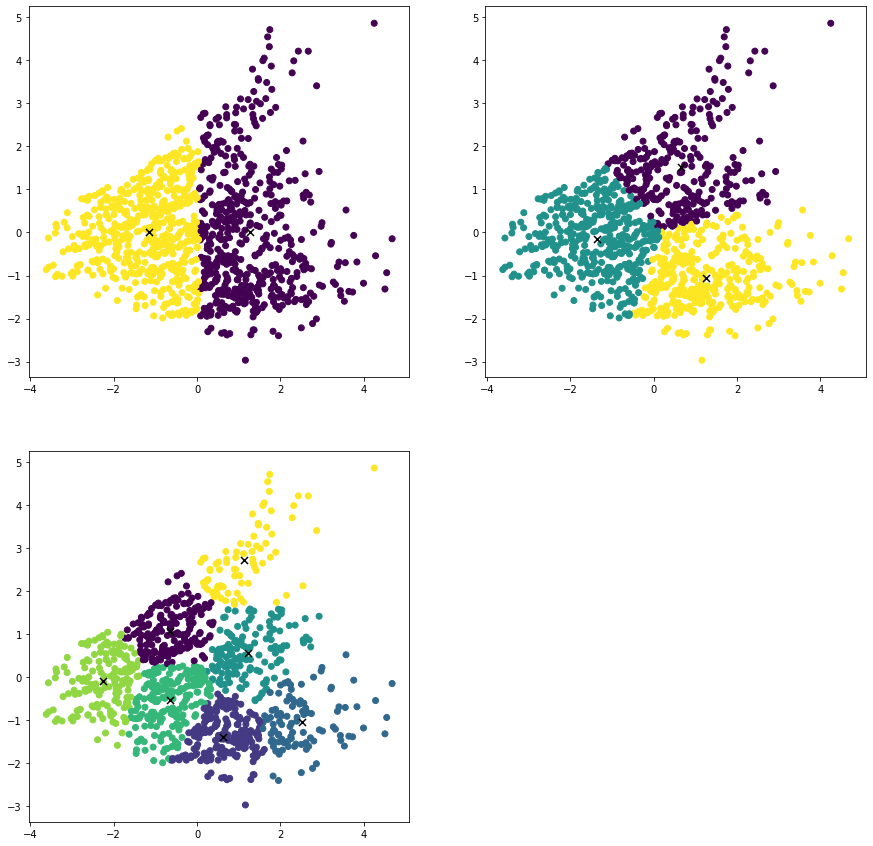

In [ ]:
from sklearn.cluster import KMeans
clusters = [2,3,7]

fig2 = plt.figure(figsize=(15, 15))
plt.title("K-means iterations")
for i in range(len(clusters)):
    plt.subplot(2, 2, i+1)
    estimator = KMeans(init='k-means++', n_clusters=clusters[i], random_state=170, n_init=1, max_iter=50)
    y_pred = estimator.fit_predict(data_pca) 
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_pred)
    plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1], s=50, marker='x', color="black")

Evaluating k++

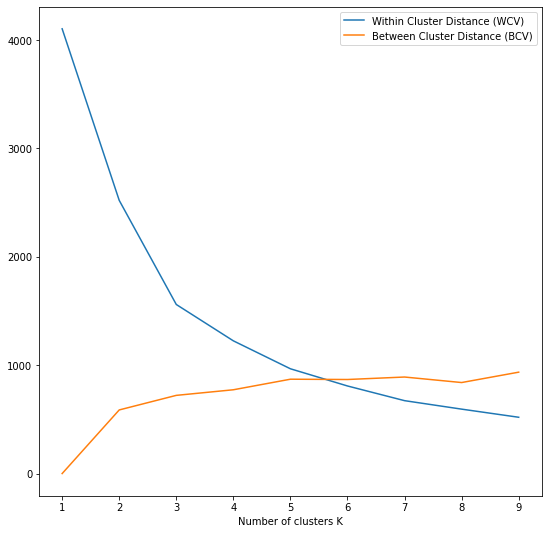

In [ ]:
from scipy.spatial import distance

fig1 = plt.figure(figsize=(9, 9))
wcv = {}
bcv = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k,max_iter=1000).fit(data_pca)
    wcv[k] = kmeans.inertia_ 
    centers = kmeans.cluster_centers_
    BCV = 0
    for i in range(len(centers)):
        for j in range(len(centers)):
            BCV += distance.euclidean(centers[i], centers[j])**2
    if(k==1):
        bcv[1] = 0
    else:
        bcv[k] = BCV/(k*(k-1))*100
plt.plot(list(wcv.keys()), list(wcv.values()), label="Within Cluster Distance (WCV)")
plt.plot(list(bcv.keys()), list(bcv.values()), label="Between Cluster Distance (BCV)")
plt.xlabel("Number of clusters K")
plt.legend()
plt.show()


Try to find an elbow in the WCV, with the BCV remaining high. -->7 clusters is the best option

#Agglomerative Clustering


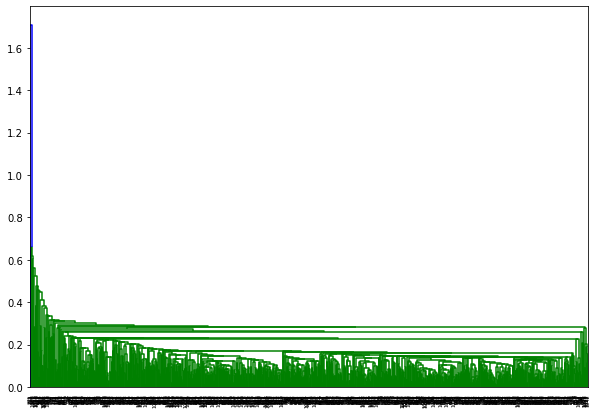

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data_pca, 'single')

#labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

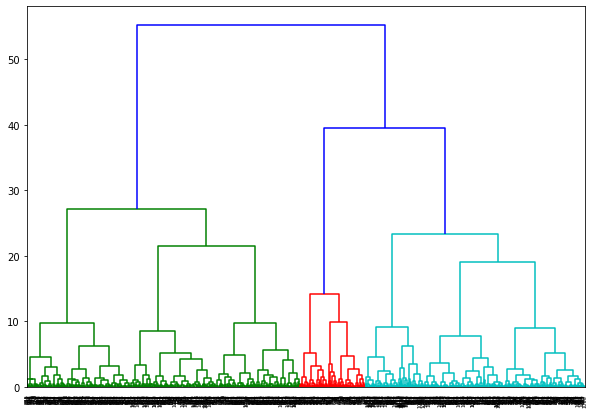

In [ ]:
linked = linkage(data_pca, 'ward')

#labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

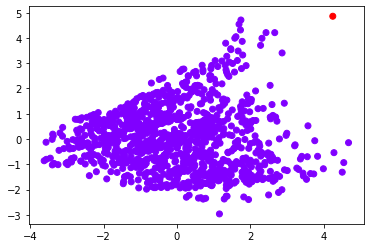

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
cluster.fit_predict(data_pca)
plt.scatter(data_pca[:,0],data_pca[:,1], c=cluster.labels_, cmap='rainbow')

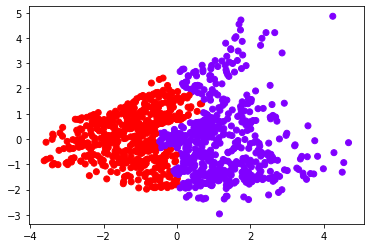

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_pca)
plt.scatter(data_pca[:,0],data_pca[:,1], c=cluster.labels_, cmap='rainbow')

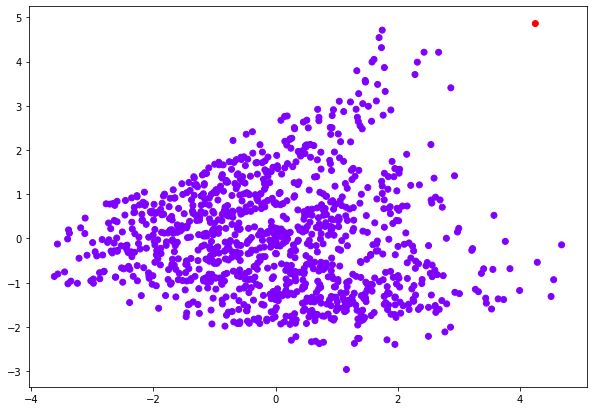

In [ ]:
cluster4 = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
cluster4.fit_predict(data)

plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:,0], data_pca[:,1], c=cluster4.labels_, cmap='rainbow')

There's obvious difference between ward linkage and single linkage. The latter has messed dendrogram which results to assigning almost all of the points in one cluster.
The average linkage does not give good results, too. 

Since we don't know the true number of clusters, some form of evaluation is needed to decide.

In [ ]:
from sklearn.metrics import calinski_harabasz_score

results = {}
for i in range(2,11):
    clusterx = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='ward')
    labels=clusterx.fit_predict(data_pca)
    #labels = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(data_pca, labels)
    results.update({i: db_index})

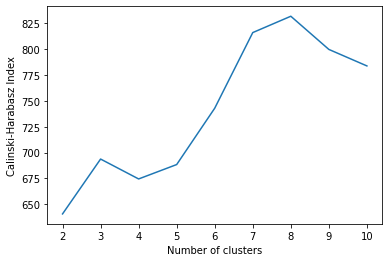

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

Three or seven are the most promising numbers.

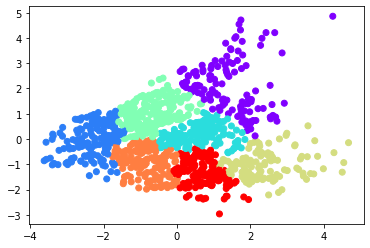

In [ ]:
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_pca)
plt.scatter(data_pca[:,0],data_pca[:,1], c=cluster.labels_, cmap='rainbow')

#Resources:
1. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
2. https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6
3. Iris Classification Example using LDA and Naive Bayes.ipynb from the ML course on Courses